In [1]:
import numpy as np
import pandas as pd

### 2. Logistic Regression with Newton's Method

#### Part 4

In [167]:
# y = np.array([[1, 1, 0, 0]]).T
# X = np.array([
#     [0.2, 3.1, 1], 
#     [1.0, 3.0, 1],
#     [-0.2, 1.2, 1], 
#     [1.0, 1.1, 1]
# ])
# w0 = np.array([[-1, 1, 0]]).T

**(a)**

In [168]:
# s0 = []
# for i in X @ w0:
#     s0.append(1 / (1 + np.exp(-i[0])))

In [169]:
# s0 = np.array([s0]).T
# s0

**(b)**

In [170]:
# D0 = np.diag([s*(1-s) for s in s0.T[0]])
# w1 = w0 + np.linalg.inv(X.T@D0@X) @ X.T @ (y - s0)
# w1

**(c)**

In [171]:
# s1 = []
# for i in X @ w1:
#     s1.append(1 / (1 + np.exp(-i[0])))

In [172]:
# s1 = np.array([s1]).T
# s1

**(d)** 

In [173]:
# D1 = np.diag([s*(1-s) for s in s1.T[0]])
# w2 = w1 + np.linalg.inv(X.T@D1@X) @ X.T @ (y - s1)
# w2

### 3 Wine Classication with Logistic Regression

In [9]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import scipy
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
data = io.loadmat("data/data.mat")
fields = ["X", "y", "X_test"]
for field in fields:
    print(field, data[field].shape)
training_X = pd.DataFrame(data=data['X'])
training_y = data['y']
test_X = pd.DataFrame(data=data['X_test'])

X (6000, 12)
y (6000, 1)
X_test (497, 12)


In [21]:
# normalize & add one

training_X_normed = (data['X'] - np.mean(data['X'], axis=0)) / np.sqrt(np.var(data['X'], axis=0))
training_X = pd.DataFrame(data=training_X_normed)

training_X[12] = np.ones(len(training_X))

training_X.head()

0         1         2         3         4         5         6   \
0 -1.094279  1.315630 -0.406234 -0.199838 -0.086498 -0.757907  0.177881   
1 -0.708083  0.126991 -0.889299 -0.472481  0.537148 -0.870115 -1.360175   
2 -0.630844 -0.787346  1.249987  1.289209 -0.398321  0.813001  0.655209   
3 -0.476366 -0.055876 -0.544253  2.222485 -0.313278  0.027547  0.549136   
4 -0.630844 -0.665435  0.076830 -0.902417 -0.341626 -0.842063  1.795492   

         7         8         9         10        11   12  
0 -0.131521  0.136834 -0.475515 -1.166822 -0.935774  1.0  
1  0.300742  2.131072 -0.072071  1.851666  0.200794  1.0  
2  0.832757 -0.424046 -0.677237 -1.418363 -0.935774  1.0  
3  1.171917 -0.860285 -0.072071 -1.082975 -0.935774  1.0  
4 -0.896293  0.697713 -0.609996  0.426269  0.200794  1.0

In [22]:
test_X_normed = (data['X_test'] - np.mean(data['X_test'], axis=0)) / np.sqrt(np.var(data['X_test'], axis=0))
test_X = pd.DataFrame(data=test_X_normed)
test_X[12] = np.ones(len(test_X))

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(training_X, training_y, test_size=0.2, random_state=140)

**Part 1**

$$w^{(t+1)} = (1 - \epsilon \lambda) w^{(t)} + \epsilon X^T(y-s(Xw^{(t)}))$$

**Part 2**

In [111]:
def logistic_scalar(c): 
    return 1 / (1 + np.exp(-c))

# v is a n*1 vector, return s(v)
def logistic_vector(v): 
    return [logistic_scalar(i) for i in v]

# def cost_func(w, lam):
#     term1 = np.log(scipy.special.expit(np.dot(X, w)))
#     term2 = np.log(1 - scipy.special.expit(np.dot(X, w)))
#     return lam * np.linalg.norm(w)**2 / 2 - np.dot(y.T, term1) - np.dot((1-y).T, term2)

def cost_func(w, X, y):
    term1 = np.log(np.clip(scipy.special.expit(np.dot(X, w)), 0.1**10, 1-0.1**10))
    term2 = np.log(np.clip(1 - scipy.special.expit(np.dot(X, w)), 0.1**10, 1-0.1**10))
    return - np.dot(y.T, term1) - np.dot((1-y).T, term2)

# def cost_func(w, X, y):
#     term1 = np.log(logistic_vector(np.dot(X, w)))
#     term2 = np.log(np.ones(len(w)) - logistic_vector(np.dot(X, w)))
#     return - np.dot(y.T, term1) - np.dot((1-y).T, term2)

In [94]:
def batch_gd(lam, eps, w0, it, X, y):
    w = w0
    for i in np.arange(it): 
        w = (1 - lam * eps) * w + eps * np.dot(X.T, y - logistic_vector(X@w))
    return w

def batch_gd_old(lam, eps, w0, it, X, y): 
    w = w0
    for i in np.arange(it): 
        w = (1 - eps * lam) * w + eps * np.dot(X.T, y - logistic_vector(np.dot(X,w)))
    return w

In [27]:
# iterations3_2 = [100, 300, 500, 800, 1000]

# lam = 0.01
# eps = 0.001
# w0 = np.vstack(np.zeros(13))

# X = training_X
# y = training_y

# weights = []
# for it in iterations3_2:
#     w = batch_gd(lam, eps, w0, it, X, y)
#     weights.append(w)
#     print(str(it)+" done!")

In [113]:
iterations3_2 = [100, 300, 500, 1000]

lams = np.arange(0.001, 0.011, 0.005)
epss = np.arange(0.01, 0.05, 0.01) # np.arange(0.0001, 0.060, 0.005)
w0 = np.vstack(np.zeros(13))

X = X_train.values
y = y_train

weights = dict()

for lam in lams: 
    for eps in epss: 
        weight = []
        for it in iterations3_2:
            w = batch_gd(lam, eps, w0, it, X, y)
            weight.append(w)
            if it == iterations3_2[-1]: 
                weights.update({(lam, eps): weight})
                print('lam='+str(lam)+' eps='+str(eps)+" done!")

lam=0.001 eps=0.01 done!
lam=0.001 eps=0.02 done!
lam=0.001 eps=0.03 done!
lam=0.001 eps=0.04 done!
lam=0.006 eps=0.01 done!
lam=0.006 eps=0.02 done!
lam=0.006 eps=0.03 done!
lam=0.006 eps=0.04 done!


(0.001, 0.01)
[84.71520865976512, 75.28245097879486, 76.30586518490558, 76.9790281215268]
(0.001, 0.02)
[104.11877049058819, 91.03825077206307, 80.27027622441733, 77.12560926846089]
(0.006, 0.01)
[84.5276693073437, 74.99334807958371, 75.94108111200342, 76.53897874538221]
(0.006, 0.02)
[103.86020420695758, 89.45854321500288, 79.32554084734409, 76.65312733739948]


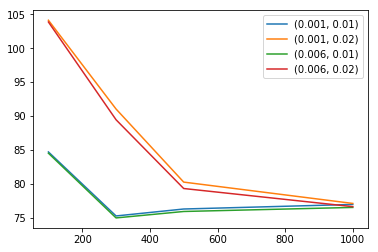

In [112]:
for key in weights.keys(): 
    lam_eps_pair = key
    print(key)
    lam_eps_weights = weights.get(lam_eps_pair)
#     print(lam_eps_weights)
    lam_eps_cost = [i[0] for i in np.concatenate([cost_func(w, X_valid, y_valid)for w in lam_eps_weights])]
    print(lam_eps_cost)
    sns.lineplot(iterations3_2, lam_eps_cost, legend='full', label=lam_eps_pair)

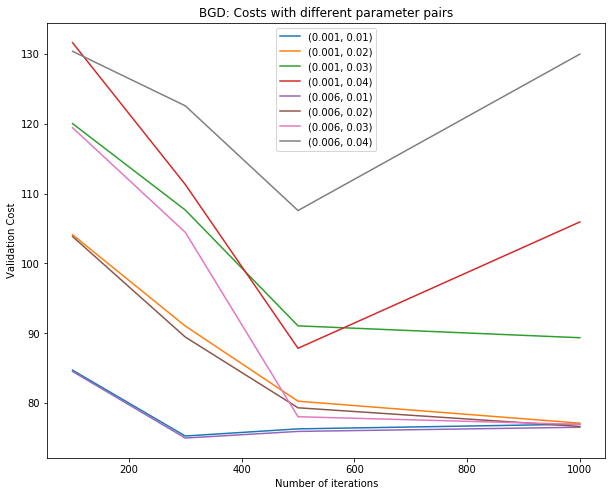

In [114]:
plt.figure(figsize=(10,8));
plt.title("BGD: Costs with different parameter pairs")
plt.xlabel("Number of iterations")
plt.ylabel("Validation Cost")

min_cost = 9999999
best_pair = None

for key in weights.keys(): 
    lam_eps_pair = key
#     print(key)
    lam_eps_weights = weights.get(lam_eps_pair)
#     print(lam_eps_weights)
    lam_eps_cost = [i[0] for i in np.concatenate([cost_func(w, X_valid, y_valid) for w in lam_eps_weights])]
#     print(lam_eps_cost)
#     break
    val = lam_eps_cost[3]
    try:
        if min_cost > val: 
            min_cost = val
            best_pair = lam_eps_pair
    except: 
        pass
#     plt.plot(iterations3_2, lam_eps_cost)
    sns.lineplot(iterations3_2, lam_eps_cost, legend='full', label=lam_eps_pair)

In [115]:
min_cost

76.53897874538221

In [116]:
best_pair

(0.006, 0.01)

In [117]:
# train the model using best_lambda and best_epsilon 

iterations3_2_new = [100, 300, 500, 1000, 3000, 6000]

lam = best_pair[0]
eps = best_pair[1]
w0 = np.vstack(np.zeros(13))

X = X_train.values
y = y_train

weights_new = []
for it in iterations3_2_new:
    w = batch_gd(lam, eps, w0, it, X, y)
    weights_new.append(w)
    print(str(it)+" done!")

100 done!
300 done!
500 done!
1000 done!
3000 done!
6000 done!


In [118]:
cost3_2_new = np.concatenate(np.concatenate([cost_func(w, X_valid, y_valid) for w in weights_new]))

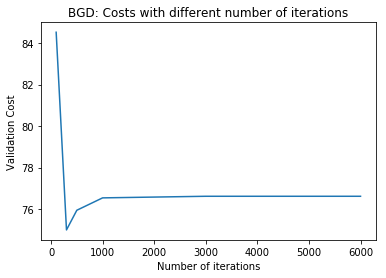

In [120]:
plt.plot(iterations3_2_new, cost3_2_new)
plt.title("BGD: Costs with different number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Validation Cost")
plt.show()

In [121]:
# cost3_2 = np.concatenate(np.concatenate([cost_func(w, X, y) for w in weights]))
# cost3_2 = np.concatenate(np.concatenate([cost_func(w, X_valid, y_valid) for w in weights]))

In [122]:
# plt.plot(iterations3_2, cost3_2)
# plt.title("BGD: Costs with different number of iterations")
# plt.xlabel("Number of iterations")
# plt.ylabel("Validation Cost")
# plt.show()

In [123]:
# # tune lambda at eps = 0.001

# iterations3_2 = [100, 300, 500, 1000]

# lams = np.arange(0.001, 0.051, 0.005)
# eps = 0.001
# w0 = np.vstack(np.zeros(13))

# X = X_train.values
# y = y_train

# weights_per_lam = []
# for lam in lams: 
#     weights = []
#     for it in iterations3_2:
#         X = X_train
#         y = y_train
#         w = batch_gd(lam, eps, w0, it, X, y)
#         weights.append(w)
#     weights_per_lam.append(weights)
#     print(str(lam)+' done!')

In [124]:
# plt.figure(figsize=(10,8));
# plt.title('Batch gradient descent, with multiple lambda values');
# plt.xlabel('Number of iterations');
# plt.ylabel('Validation Cost');
# lam_at_max = []
# for i in np.arange(len(lams)): 
#     cost_curr = np.concatenate(np.concatenate([cost_func(w, X_valid, y_valid) for w in weights_per_lam[i]]))
#     sns.lineplot(iterations3_2, cost_curr, legend='full', label=lams[i])
#     lam_at_max.append(cost_curr[3])

In [125]:
# best_lambda = lams[lam_at_max.index(min(lam_at_max))]
# best_lambda

In [126]:
# tune eplison at best_lambda=0.001

# best_lambda3_2 = 0.001

# lam = best_lambda3_2
# epss = np.arange(0.0001, 0.055, 0.005)
# w0 = np.vstack(np.zeros(13))

# weights_per_eps = []
# for eps in epss: 
#     weights = []
#     for it in iterations3_2:
#         X = X_train
#         y = y_train
#         w = batch_gd(lam, eps, w0, it, X, y)
#         weights.append(w)
#     weights_per_eps.append(weights)
#     print(str(eps)+' done!')

In [127]:
# plt.figure(figsize=(10,8));
# plt.title('Batch gradient descent, with multiple epsilon values');
# plt.xlabel('Number of iterations');
# plt.ylabel('Validation Cost');
# eps_at_max = []
# for i in np.arange(len(epss)): 
#     cost_curr = np.concatenate(np.concatenate([cost_func(w, X_valid, y_valid) for w in weights_per_eps[i]]))
#     sns.lineplot(iterations3_2, cost_curr, legend='full', label=epss[i])
#     eps_at_max.append(cost_curr[len(iterations3_2)-1])

In [128]:
# best_epsilon = epss[eps_at_max.index(min(eps_at_max))]
# best_epsilon

In [129]:
# train the model using best_lambda = 0.01 and best_epsilon = 0.05

# lam = 0.001 # best_lambda3_2
# epss = 0.0001 # best_epsilon
# w0 = np.vstack(np.zeros(13))

# weights = []
# for it in iterations3_2:
#     X = X_train
#     y = y_train
#     w = batch_gd(lam, eps, w0, it, X, y)
#     weights.append(w)
#     print(str(it)+' done!')

In [130]:
# cost3_2 = np.concatenate(np.concatenate([cost_func(w, X_valid, y_valid) for w in weights]))

In [131]:
# plt.plot(iterations3_2, cost3_2)
# plt.title("BGD: Costs with different number of iterations")
# plt.xlabel("Number of iterations")
# plt.ylabel("Validation Cost")
# plt.show()

**Part 3**

$$w^{(t+1)} = (1 - \epsilon \lambda) w^{(t)} + \epsilon X_j^T(y_j-s_j))$$ where $X_j$ is the jth row of X and $s_j = s(X_j·w^{(t)})$

**Part 4**

In [133]:
# assume X and y also shuffled and set
def stochastic_gd(X, y, lam, eps, w0, it): 
    w = w0
    for i in np.arange(it): 
        w = (1 - eps * lam) * w + eps * np.vstack(X[i]) * (y[i] - logistic_vector(np.dot(X[i],w)))
    return w

In [135]:
iterations3_4 = [100, 500, 1000, 3300, 5000]

lams = np.arange(0.001, 0.055, 0.006)
epss = np.arange(0.01, 0.055, 0.006) # np.arange(0.0001, 0.060, 0.005)
w0 = np.vstack(np.zeros(13))

X = X_train.values
y = y_train

weights = dict()

for lam in lams: 
    for eps in epss: 
        weight = []
        for it in iterations3_4:
            X_train_temp = X_train.copy()
            X_train_temp['label'] = y_train
            X_train_temp = X_train_temp.sample(n=it, replace=True, random_state=140).reset_index(drop=True)
            X = X_train_temp.drop('label', axis=1).values
            y = X_train_temp['label']
            
            w = stochastic_gd(X, y, lam, eps, w0, it)
            weight.append(w)
            if it == iterations3_2[-1]: 
                weights.update({(lam, eps): weight})
                print('lam='+str(lam)+' eps='+str(eps)+" done!")

lam=0.001 eps=0.01 done!
lam=0.001 eps=0.016 done!
lam=0.001 eps=0.022 done!
lam=0.001 eps=0.028000000000000004 done!
lam=0.001 eps=0.034 done!
lam=0.001 eps=0.04 done!
lam=0.001 eps=0.046000000000000006 done!
lam=0.001 eps=0.052000000000000005 done!
lam=0.007 eps=0.01 done!
lam=0.007 eps=0.016 done!
lam=0.007 eps=0.022 done!
lam=0.007 eps=0.028000000000000004 done!
lam=0.007 eps=0.034 done!
lam=0.007 eps=0.04 done!
lam=0.007 eps=0.046000000000000006 done!
lam=0.007 eps=0.052000000000000005 done!
lam=0.013000000000000001 eps=0.01 done!
lam=0.013000000000000001 eps=0.016 done!
lam=0.013000000000000001 eps=0.022 done!
lam=0.013000000000000001 eps=0.028000000000000004 done!
lam=0.013000000000000001 eps=0.034 done!
lam=0.013000000000000001 eps=0.04 done!
lam=0.013000000000000001 eps=0.046000000000000006 done!
lam=0.013000000000000001 eps=0.052000000000000005 done!
lam=0.019000000000000003 eps=0.01 done!
lam=0.019000000000000003 eps=0.016 done!
lam=0.019000000000000003 eps=0.022 done!
lam=0

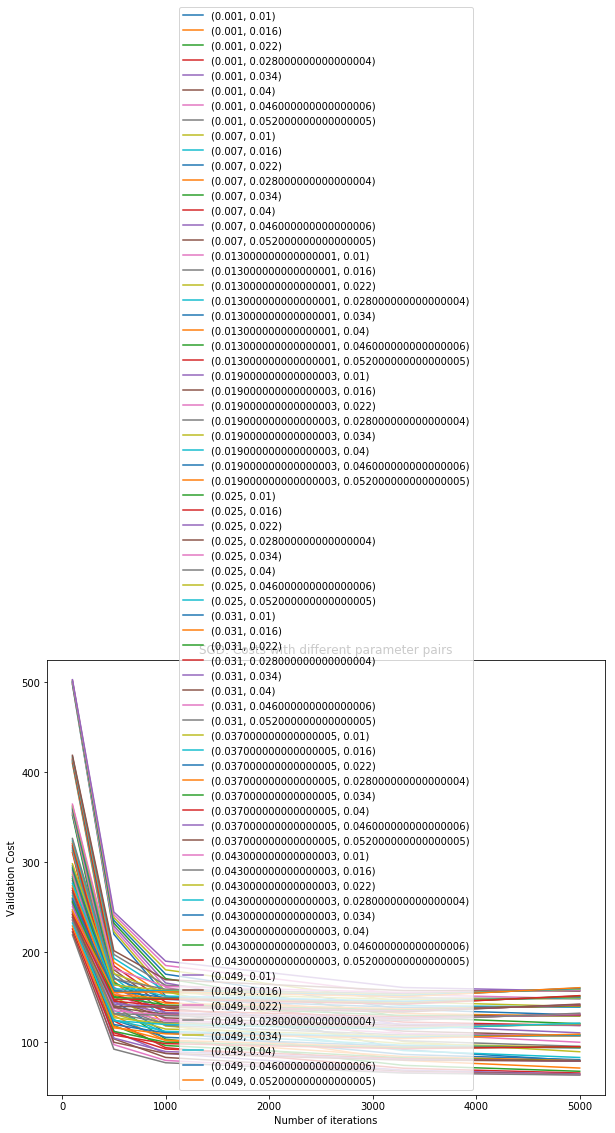

In [136]:
plt.figure(figsize=(10,8));
plt.title("SGD: Costs with different parameter pairs")
plt.xlabel("Number of iterations")
plt.ylabel("Validation Cost")

min_cost = 9999999
best_pair = None

for key in weights.keys(): 
    lam_eps_pair = key
#     print(key)
    lam_eps_weights = weights.get(lam_eps_pair)
#     print(lam_eps_weights)
    lam_eps_cost = [i[0] for i in np.concatenate([cost_func(w, X_valid, y_valid)for w in lam_eps_weights])]
#     print(lam_eps_cost)
#     break
    val = lam_eps_cost[3]
    try:
        if min_cost > val: 
            min_cost = val
            best_pair = lam_eps_pair
    except: 
        pass
#     plt.plot(iterations3_2, lam_eps_cost)
    sns.lineplot(iterations3_4, lam_eps_cost, legend='full', label=lam_eps_pair)

In [137]:
min_cost

65.6378838276401

In [138]:
best_pair

(0.001, 0.052000000000000005)

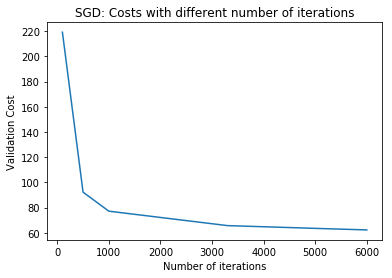

In [139]:
# train the model using best_lambda and best_epsilon 
iterations3_4_new = [100, 500, 1000, 3300, 5000, 6000]

lam = best_pair[0]
eps = best_pair[1]
w0 = np.vstack(np.zeros(13))

weights = []
for it in iterations3_4_new:
    X_train_temp = X_train.copy()
    X_train_temp['label'] = y_train
    X_train_temp = X_train_temp.sample(n=it, replace=True, random_state=140).reset_index(drop=True)
    X = X_train_temp.drop('label', axis=1).values
    y = X_train_temp['label']
    w = stochastic_gd(X, y, lam, eps, w0, it)
    weights.append(w)
cost3_4_new = np.concatenate(np.concatenate([cost_func(w, X_valid, y_valid) for w in weights]))
plt.plot(iterations3_4_new, cost3_4_new)
plt.title("SGD: Costs with different number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Validation Cost")
plt.show()

**We observe that batch gradient descent converges faster than stochastic gradient descent.**

In [ ]:
# tune lambda at eps = 0.01

# iterations3_4 = [100, 500, 1000, 3300, 5000]

# lams = np.arange(0.005, 0.105, 0.005)
# eps = 0.01
# w0 = np.vstack(np.zeros(13))


# weights_per_lam = []
# for lam in lams: 
#     weights = []
#     for it in iterations3_4:
#         X_train_temp = X_train.copy()
#         X_train_temp['label'] = y_train
#         X_train_temp = X_train_temp.sample(n=it, replace=True, random_state=140).reset_index(drop=True)
#         X = X_train_temp.drop('label', axis=1)
#         y = X_train_temp['label']
# #         w = batch_gd(lam, eps, w0, it, X, y)
#         w = stochastic_gd(X, y, lam, eps, w0, it)
#         weights.append(w)
#     weights_per_lam.append(weights)
#     print(str(lam)+' done!')

In [ ]:
# plt.figure(figsize=(10,8));
# plt.title('Stochastic gradient descent, with multiple lambda values');
# plt.xlabel('Number of iterations');
# plt.ylabel('Validation Cost');
# lam_at_max = []
# for i in np.arange(len(lams)): 
#     cost_curr = np.concatenate(np.concatenate([cost_func(w, X_valid, y_valid) for w in weights_per_lam[i]]))
#     sns.lineplot(iterations3_4, cost_curr, legend='full', label=lams[i])
#     lam_at_max.append(cost_curr[4])

In [ ]:
# best_lambda = lams[lam_at_max.index(min(lam_at_max))]
# best_lambda

In [ ]:
# tune epsilon at best lambda = 0.01 to prevent overfitting
# best_lambda3_4 = 0.01

# iterations3_4 = [100, 500, 1000, 3300, 5000]

# lam = best_lambda3_4
# epss = np.arange(0.001, 1, 0.05)
# w0 = np.vstack(np.zeros(13))

# weights_per_eps = []
# for eps in epss: 
#     weights = []
#     for it in iterations3_4:
#         X_train_temp = X_train.copy()
#         X_train_temp['label'] = y_train
#         X_train_temp = X_train_temp.sample(n=it, replace=True, random_state=140).reset_index(drop=True)
#         X = X_train_temp.drop('label', axis=1)
#         y = X_train_temp['label']
#         w = stochastic_gd(X, y, lam, eps, w0, it)
#         weights.append(w)
#     weights_per_eps.append(weights)
#     print(str(eps)+' done!')

In [ ]:
# plt.figure(figsize=(10,8));
# plt.title('Stochastic gradient descent, with multiple epsilon values');
# plt.xlabel('Number of iterations');
# plt.ylabel('Validation Cost');
# eps_at_max = []
# for i in np.arange(len(epss)): 
#     cost_curr = np.concatenate(np.concatenate([cost_func(w, X_valid, y_valid) for w in weights_per_eps[i]]))
#     sns.lineplot(iterations3_4, cost_curr, legend='full', label=epss[i])
#     eps_at_max.append(cost_curr[4])

In [ ]:
# best_epsilon = epss[eps_at_max.index(min(eps_at_max))]
# best_epsilon

In [ ]:
# train the model using best_lambda = 0.01 and best_epsilon = 0.05
# iterations3_4 = [100, 500, 1000, 3300, 5000]

# lam = best_lambda3_4
# eps = best_epsilon
# w0 = np.vstack(np.zeros(13))

# weights = []
# for it in iterations3_4:
#     X_train_temp = X_train.copy()
#     X_train_temp['label'] = y_train
#     X_train_temp = X_train_temp.sample(n=it, replace=True, random_state=140).reset_index(drop=True)
#     X = X_train_temp.drop('label', axis=1)
#     y = X_train_temp['label']
#     w = stochastic_gd(X, y, lam, eps, w0, it)
#     weights.append(w)

In [ ]:
# cost3_4 = np.concatenate(np.concatenate([cost_func(w, X_valid, y_valid) for w in weights]))

In [ ]:
# plt.plot(iterations3_4, cost3_4)
# plt.title("SGD: Costs with different number of iterations")
# plt.xlabel("Number of iterations")
# plt.ylabel("Validation Cost")
# plt.show()

**Part 5**

In [140]:
# assume X and y also shuffled and set
def stochastic_gd_new(X, y, lam, the, w0, it): 
    w = w0
    for i in np.arange(1, it+1): 
        w = (1 - the/i * lam) * w + the/i * np.vstack(X.values[i]) * (y[i] - logistic_vector(np.dot(X.values[i],w)))
    return w

In [147]:
# tune theta 

iterations3_4 = [100, 500, 1000, 3300, 5000]

lam = 0.01
thes = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10]
w0 = np.vstack(np.zeros(13))

weights_per_the = []
for the in thes: 
    weights = []
    for it in iterations3_4:
        X_train_temp = X_train.copy()
        X_train_temp['label'] = y_train
        X_train_temp = X_train_temp.sample(n=it, replace=True, random_state=140).reset_index(drop=True)
        X = X_train_temp.drop('label', axis=1)
        y = X_train_temp['label']
        w = stochastic_gd(X.values, y, lam, the, w0, it)
        weights.append(w)
    weights_per_the.append(weights)
    print(str(the)+' done!')

0.001 done!
0.005 done!
0.01 done!
0.05 done!
0.1 done!
0.5 done!
1 done!
10 done!


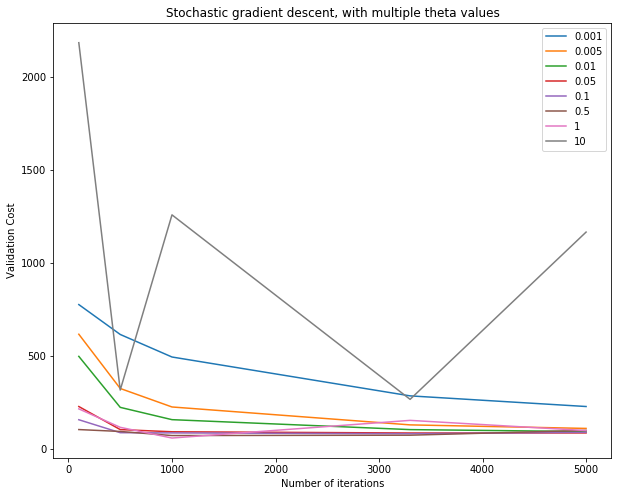

In [148]:
plt.figure(figsize=(10,8));
plt.title('Stochastic gradient descent, with multiple theta values');
plt.xlabel('Number of iterations');
plt.ylabel('Validation Cost');
the_at_max = []
for i in np.arange(len(thes)): 
    cost_curr = np.concatenate(np.concatenate([cost_func(w, X_valid, y_valid) for w in weights_per_the[i]]))
    sns.lineplot(iterations3_4, cost_curr, legend='full', label=thes[i])
    the_at_max.append(cost_curr[len(iterations3_4)-1])

In [149]:
best_theta = thes[the_at_max.index(min(the_at_max))]
best_theta

0.05

In [151]:
# train the model using best_lambda = 0.01 and best_theta = 0.05
iterations3_4 = [100, 500, 1000, 3300, 5000]

lam = best_lambda3_4
the = best_theta
w0 = np.vstack(np.zeros(13))

weights = []
for it in iterations3_4:
    X_train_temp = X_train.copy()
    X_train_temp['label'] = y_train
    X_train_temp = X_train_temp.sample(n=it, replace=True, random_state=140).reset_index(drop=True)
    X = X_train_temp.drop('label', axis=1)
    y = X_train_temp['label']
    w = stochastic_gd(X.values, y, lam, the, w0, it)
    weights.append(w)

In [152]:
cost3_5 = np.concatenate(np.concatenate([cost_func(w, X_valid, y_valid) for w in weights]))

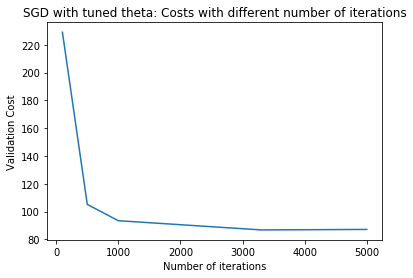

In [153]:
plt.plot(iterations3_4, cost3_5)
plt.title("SGD with tuned theta: Costs with different number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Validation Cost")
plt.show()

In [154]:
from sklearn.metrics import accuracy_score

def decision(num):
    if num < 0.5: 
        return 0
    return 1

for vec in [logistic_vector(np.dot(X_valid, w)) for w in weights]: 
    print(accuracy_score([decision(i) for i in vec], y_valid))

0.985
0.9883333333333333
0.9883333333333333
0.9916666666666667
0.9908333333333333


**It converges more quickly than the model in part 4, and remains stably low compared to some epsilon values in part 4.**

**Part 6**

In [156]:
# train the model using best_lambda = 0.01 and best_theta = 0.05

lam = best_lambda3_4
the = best_theta
w0 = np.vstack(np.zeros(13))

it = 5000
X_train_temp = training_X.copy()
X_train_temp['label'] = training_y
X_train_temp = X_train_temp.sample(n=it, replace=True, random_state=140).reset_index(drop=True)
X = X_train_temp.drop('label', axis=1)
y = X_train_temp['label']
w = stochastic_gd(X.values, y, lam, the, w0, it)

In [157]:
def decision(num):
    if num < 0.5: 
        return 0
    return 1


In [158]:
# Usage results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')

y_test = np.array([decision(i) for i in logistic_vector(np.dot(test_X, w))])
results_to_csv(y_test)